In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [60]:
data = pd.read_csv("Expanded_data_with_more_features.csv")
df = pd.DataFrame(data)
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [61]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [63]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#### Drop Unnamed Columns


In [64]:

df = df.drop("Unnamed: 0" , axis = 1)
print(df)

       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly    

#### Change Weekly Study Hours Columns


In [65]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Student Result Analysis

### Gender Distribution

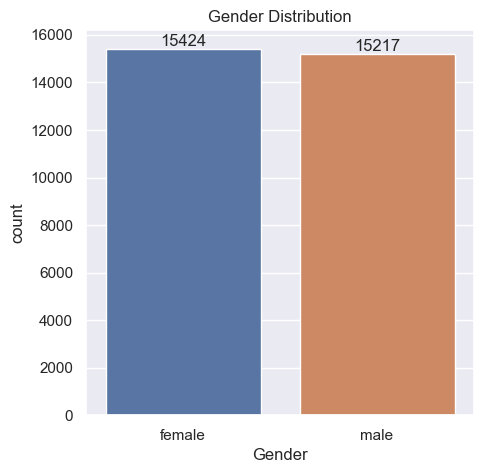

In [66]:
ax =sns.countplot(data =df , x ="Gender",hue ="Gender")
sns.set(rc ={"figure.figsize":(7,6)})
plt.title ("Gender Distribution")
for bars in ax.containers:
    ax.bar_label(bars)

### On the Basis  of Parents Education

In [67]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [68]:
bx = df.groupby(["ParentEduc"]).agg({"MathScore":"mean" ,"ReadingScore":"mean" ,"WritingScore":"mean"})
print(bx)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


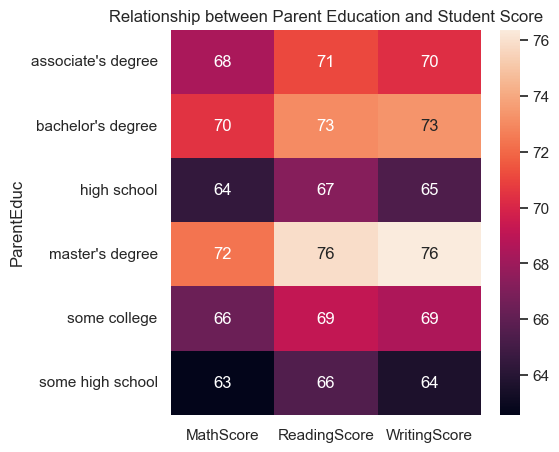

In [69]:
sns.set(rc ={"figure.figsize":(5,5)})
sns.heatmap(bx,annot =True)
plt.title("Relationship between Parent Education and Student Score")
plt.show()

#### From above chart ,we conclude  that parent education has direct impact on their child score .The higher they got educated,good score of their childs 

### ParentMaritalStatus

In [56]:
cx = df.groupby(["ParentMaritalStatus"]).agg({"MathScore":"mean" ,"ReadingScore":"mean" ,"WritingScore":"mean"})
print(bx)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


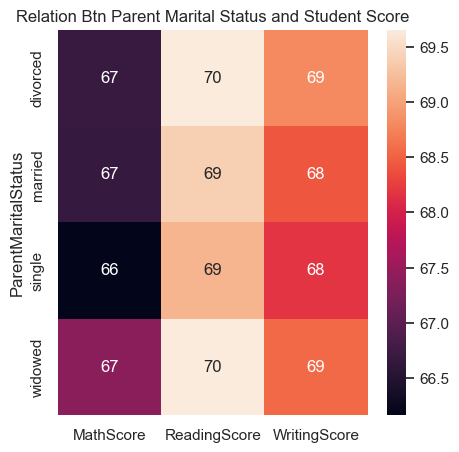

In [57]:
sns.set(rc ={"figure.figsize":(5,5)})
sns.heatmap(cx,annot =True)
plt.title("Relation Btn Parent Marital Status and Student Score")
plt.show()

#### From above chart we found that Parent Marital Status didnt have direct impact on the score as there is no much difference in score.

### Score on the Basis of Subject 


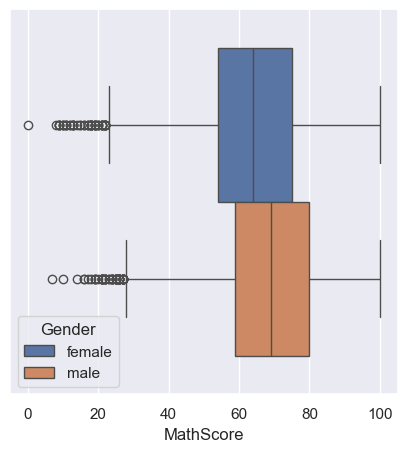

In [58]:
sns.boxplot(data =df , x="MathScore",hue ="Gender")
plt.show()

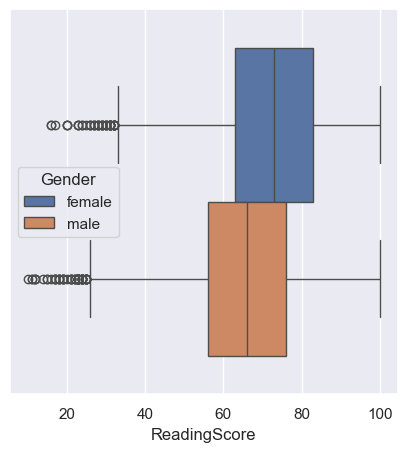

In [59]:
sns.boxplot(data =df , x="ReadingScore",hue = "Gender")
plt.show()

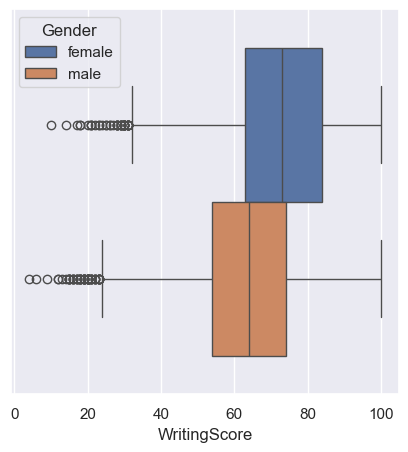

In [60]:
sns.boxplot(data =df , x="WritingScore",hue = "Gender")
plt.show()

#### From these plots,on average students are more weak in math ,female got less in average in math. But in reading and writing female gets more than male in average.


### Distribution Of Ethnics Groups 

In [63]:
print(df["EthnicGroup"].unique())


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


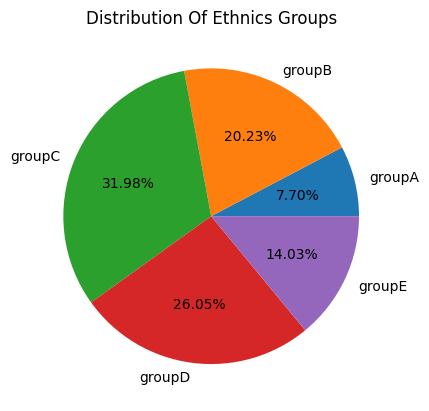

In [5]:
groupA=df.loc[(df["EthnicGroup"] == "group A")].count() 
#print(groupA)
groupB =df.loc[(df["EthnicGroup"] == "group B")].count()
groupC =df.loc[(df["EthnicGroup"] == "group C")].count()
groupD =df.loc[(df["EthnicGroup"] == "group D")].count()
groupE =df.loc[(df["EthnicGroup"] == "group E")].count()
mylist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
l =["groupA","groupB","groupC","groupD","groupE"]
plt.pie(mylist,labels =l,autopct ="%1.2f%%")
plt.title("Distribution Of Ethnics Groups")
plt.show()


#### From the above chart we find that most of the students are from Ethnic Group C.

### Based On Practice Sports


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')


In [11]:
ax = df.groupby(["PracticeSport"],as_index =False).agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(ax)

  PracticeSport  MathScore  ReadingScore  WritingScore
0         never  64.171079     68.337662     66.522727
1     regularly  67.839155     69.943019     69.604003
2     sometimes  66.274831     69.241307     68.072438


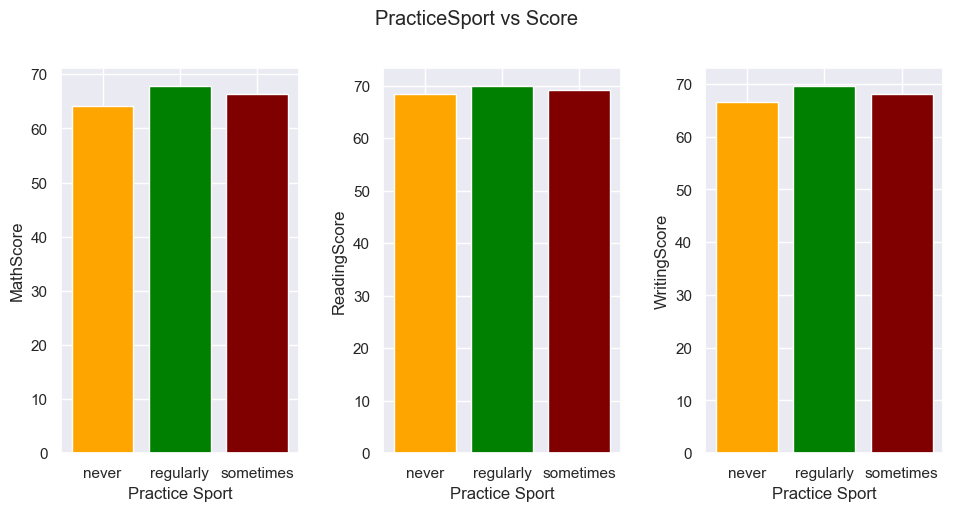

In [55]:
plt.figure(figsize=(10, 5))
c = {"maroon", "orange", "green"}
# Subplot 1: MathScore
plt.subplot(1, 3, 1)
plt.bar(df["PracticeSport"], df["MathScore"],color =c)# hue ="PracticeSport")
plt.xlabel("Practice Sport")
plt.ylabel("MathScore")

# Subplot 2: ReadingScore
plt.subplot(1, 3, 2)
plt.bar(df["PracticeSport"], df["ReadingScore"], color=c)
plt.xlabel("Practice Sport")
plt.ylabel("ReadingScore")

# Subplot 3: WritingScore
plt.subplot(1, 3, 3)
plt.bar(df["PracticeSport"], df["WritingScore"], color=c)
plt.xlabel("Practice Sport")
plt.ylabel("WritingScore")

# Adjust layout
plt.tight_layout(pad =2.0)

plt.suptitle("PracticeSport vs Score",y =1.05) # Adjust the vertical position of the title
# Show the plot
plt.show()


#### From above plot, we  get that regulary  practice has slightly greater value which does not make any impact .So,there is not  much relation with practice sport with score..

## ** Conclusion

### We conclude that most of the students are from Ethnic Group C and are female where parent marital status and practising sports didnt have direct impact on score and higher the parent education,more the score.